In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd drive/My Drive/riyad_workshop

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
/content/drive/My Drive/riyad_workshop


In [0]:
import pandas as pd

df_tweet = pd.read_csv('tweet-featues.csv')
df_topic = pd.read_csv('topic-features-news.csv')

In [3]:
for tweet_num,sub_tweet in enumerate(df_tweet['Topic_Name']):
  for topic_num,topic in enumerate(df_topic['Topic_Name']):
    if sub_tweet==topic:
      #print (df_topic['Topic_Detection'][topic_num],'----->',topic_num+2)
      if df_topic['Topic_Detection'][topic_num] =='Rumor':
        df_tweet['Topic_Detection'][tweet_num]=1
        break
      else:
        df_tweet['Topic_Detection'][tweet_num]=0
        break     

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [4]:
df_tweet.head()

,Topic_Name,user_Nametype,tweet,tweet_without_EOL,tweet_type,tweet_id,tweet_length,tweet_contains_mention,tweet_contains_URL,tweet_contains_hashtag,tweet_is_retweet,tweet_contains_multimedia,Tweet_contains_NSFW_content,tweet_contains_question_marks,tweet_sentiment,tweet_contains_exclamation,tweet_contains_happy_smileys,tweet_contains_sad_smileys,tweet_has_specific_words,Authors_hasURL_in_his_home_page,The_number_of_favorites,Is_Author_Credible,registration_age,Number_of_followers,Number_of_following,Number_of_retweets,Reputaion_Score,Is_authors_has_description,Author_has_Notification,Author_followed_by_credibleuser,Time_span,listed_count,Number_of_tweet_posted,User_effect,Topic_Detection
0,شاب سعودي ينقذ طفل من امام القطار في بلجيكا,Personal,شجاعة شاب #سعودي ينقذ طفلاً\nفي #بلجيكا\nقبل أ...,شجاعة شاب سعودي ينقذ طفلاً في بلجيكا قبل أن يد...,News,9.537425e+17,209,0,1,1,0,0,0,0,Positive,0,0,0,0,0,1,0,1,6877,296,3,0.96,1,0,0,1,4,3210,23.23,1.0
1,شاب سعودي ينقذ طفل من امام القطار في بلجيكا,Personal,RT @albadah64: شجاعة شاب #سعودي ينقذ طفلاً\nفي...,شجاعة شاب سعودي ينقذ طفلاً في بلجيكا قبل أن ي...,News,9.537439e+17,233,0,0,1,1,0,0,0,Positive,0,0,0,0,0,0,0,5,1108,2375,3,0.32,1,0,0,5,2,16212,0.47,1.0
2,شاب سعودي ينقذ طفل من امام القطار في بلجيكا,Personal,RT @albadah64: شجاعة شاب #سعودي ينقذ طفلاً\nفي...,شجاعة شاب سعودي ينقذ طفلاً في بلجيكا قبل أن ي...,News,9.539634e+17,233,0,0,1,1,0,0,0,Positive,0,0,0,0,0,0,0,0,0,24,3,0.00,1,0,0,0,0,15,0.00,1.0
3,شاب سعودي ينقذ طفل من امام القطار في بلجيكا,Personal,@msoa1953 انا صاحب المقطع، وانا شاب سعودي مقيم...,انا صاحب المقطع، وانا شاب سعودي مقيم في بلجيك...,News,9.539652e+17,223,0,1,0,0,0,0,0,Positive,0,0,0,0,0,0,0,0,21,296,0,0.07,1,0,0,0,0,440,0.07,1.0
4,شاب سعودي ينقذ طفل من امام القطار في بلجيكا,Personal,شجاعه شاب سعودي في بلجيكا كفو عليك انقذت ...,شجاعه شاب سعودي في بلجيكا كفو عليك انقذت طفل ...,News,9.539716e+17,133,0,0,0,0,1,0,0,Positive,0,0,0,0,0,15,0,4,1140,605,8,0.65,1,0,0,4,1,3533,1.88,1.0


In [0]:
df_y = df_tweet['Topic_Detection']
df_x = df_tweet.drop(['Topic_Name', 'tweet','tweet_without_EOL','tweet_id','user_Nametype','tweet_type','Topic_Detection'], axis=1)

In [6]:
df_x.head()

,tweet_length,tweet_contains_mention,tweet_contains_URL,tweet_contains_hashtag,tweet_is_retweet,tweet_contains_multimedia,Tweet_contains_NSFW_content,tweet_contains_question_marks,tweet_sentiment,tweet_contains_exclamation,tweet_contains_happy_smileys,tweet_contains_sad_smileys,tweet_has_specific_words,Authors_hasURL_in_his_home_page,The_number_of_favorites,Is_Author_Credible,registration_age,Number_of_followers,Number_of_following,Number_of_retweets,Reputaion_Score,Is_authors_has_description,Author_has_Notification,Author_followed_by_credibleuser,Time_span,listed_count,Number_of_tweet_posted,User_effect,Topic_Detection
0,209,0,1,1,0,0,0,0,Positive,0,0,0,0,0,1,0,1,6877,296,3,0.96,1,0,0,1,4,3210,23.23,1.0
1,233,0,0,1,1,0,0,0,Positive,0,0,0,0,0,0,0,5,1108,2375,3,0.32,1,0,0,5,2,16212,0.47,1.0
2,233,0,0,1,1,0,0,0,Positive,0,0,0,0,0,0,0,0,0,24,3,0.00,1,0,0,0,0,15,0.00,1.0
3,223,0,1,0,0,0,0,0,Positive,0,0,0,0,0,0,0,0,21,296,0,0.07,1,0,0,0,0,440,0.07,1.0
4,133,0,0,0,0,1,0,0,Positive,0,0,0,0,0,15,0,4,1140,605,8,0.65,1,0,0,4,1,3533,1.88,1.0


In [0]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df_x['tweet_sentiment'] = le.fit_transform(df_x['tweet_sentiment'])

In [0]:
from sklearn import preprocessing
import numpy as np
scaler = preprocessing.MinMaxScaler()
x_data = scaler.fit_transform(df_x)

In [9]:
x_data[0]

array([6.37323944e-01, 0.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 3.83582662e-04, 0.00000000e+00,
       9.09090909e-02, 3.83432825e-04, 1.32895795e-04, 3.22026621e-04,
       9.60000000e-01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       9.09090909e-02, 2.16286363e-04, 1.46537844e-03, 1.80585679e-06,
       1.00000000e+00])

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model,Sequential
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding,Flatten
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
import tensorflow as tf

Using TensorFlow backend.


In [0]:
from sklearn import model_selection

Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(x_data,df_y,test_size=0.25,random_state=101)

In [0]:
from sklearn.preprocessing import LabelEncoder
Encoder = LabelEncoder()
Train_Y = Encoder.fit_transform(Train_Y)
Test_Y = Encoder.fit_transform(Test_Y)

In [0]:
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(len(x_data[0]),)))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))

In [0]:
model.compile(loss='binary_crossentropy',optimizer='sgd',metrics=['accuracy'])

In [23]:
history =  model.fit(Train_X,Train_Y,batch_size=128,epochs=10,validation_data=(Test_X, Test_Y))

Train on 80362 samples, validate on 26788 samples
Epoch 1/10
80362/80362 [==============================] - 2s 27us/step - loss: 0.3428 - acc: 0.8488 - val_loss: 0.1868 - val_acc: 0.9938
Epoch 2/10
80362/80362 [==============================] - 2s 22us/step - loss: 0.1144 - acc: 0.9976 - val_loss: 0.0645 - val_acc: 1.0000
Epoch 3/10
80362/80362 [==============================] - 2s 22us/step - loss: 0.0480 - acc: 1.0000 - val_loss: 0.0317 - val_acc: 1.0000
Epoch 4/10
80362/80362 [==============================] - 2s 22us/step - loss: 0.0269 - acc: 1.0000 - val_loss: 0.0194 - val_acc: 1.0000
Epoch 5/10
80362/80362 [==============================] - 2s 22us/step - loss: 0.0179 - acc: 1.0000 - val_loss: 0.0134 - val_acc: 1.0000
Epoch 6/10
80362/80362 [==============================] - 2s 21us/step - loss: 0.0132 - acc: 1.0000 - val_loss: 0.0100 - val_acc: 1.0000
Epoch 7/10
80362/80362 [==============================] - 2s 22us/step - loss: 0.0102 - acc: 1.0000 - val_loss: 0.0079 - val_acc

In [0]:
model.save('mlp_model.h5')

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
{'val_loss': [0.18682572323474597, 0.06454344518450422, 0.03170972023917451, 0.019394024994073562, 0.013414179618383176, 0.00999751247129628, 0.007852982250175068, 0.006397855258105236, 0.0053578089034454325, 0.004580353368482555], 'val_acc': [0.9938405256084815, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 'loss': [0.34284631218194267, 0.1144302549114469, 0.047959301181309824, 0.026885932137208447, 0.017874375328337966, 0.013165207145836353, 0.010191970720076134, 0.008258008619745422, 0.006867809943148894, 0.005890938590370944], 'acc': [0.84875936387845, 0.997623254772156, 0.9999502252308305, 1.0, 0.9999875563077076, 1.0, 1.0, 1.0, 1.0, 1.0]}


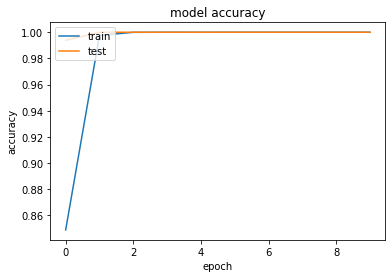

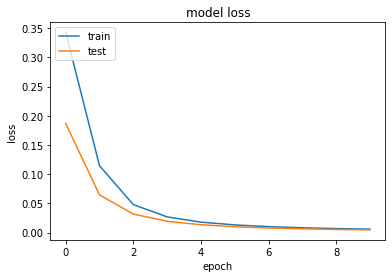

<Figure size 432x288 with 0 Axes>

In [24]:
print(history.history.keys())
# summarize history for accuracy
print (history.history)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.savefig('lstm_acc.png')
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.savefig('lstm_loss.png')

In [0]:
label = model.predict(Test_X,batch_size=32,verbose = 2)

In [27]:
label

array([[0.00222901],
       [0.00336012],
       [0.00239888],
       ...,
       [0.99539125],
       [0.995378  ],
       [0.00121861]], dtype=float32)

In [29]:
y_hat=[]
for i in label:
  y_hat = np.append(y_hat,np.argmax(i))

y_hat  

array([0., 0., 0., ..., 0., 0., 0.])

In [30]:
from sklearn.metrics import precision_recall_fscore_support
precision,recall,f1_macro,_ = precision_recall_fscore_support(Test_Y,y_hat,average='macro')

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


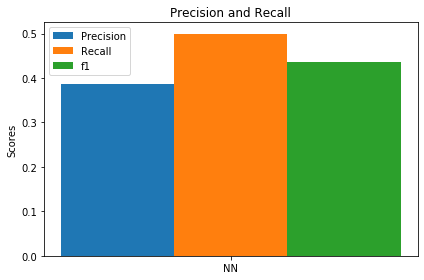

In [31]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

labels = ['NN']
bar1 = [precision]
bar2 = [recall]
bar3 = [f1_macro]

x = np.arange(len(labels))  
width = 0.2 

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, bar1, width, label='Precision')
rects2 = ax.bar(x, bar2, width, label='Recall')
rects3 = ax.bar(x + width, bar3, width, label='f1')

ax.set_ylabel('Scores')
ax.set_title('Precision and Recall')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
fig.tight_layout()

plt.show()